# PAOS

This notebook demonstrates the basic functionality of PAOS.

Select the desired example configuration desired below

In [1]:
import os, time

## Inputs

Define lens file to use

In [2]:
OpticalPrescription = 'Excite_TEL.ini'

OpticalPrescriptionFile = os.path.join('../lens data', OpticalPrescription)

In [3]:
# Parse lens file
from paos.core.parseConfig import parse_config
pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config(OpticalPrescriptionFile)

## Ray tracing
Implement a full raytracing. For diagnostic purposes.

In [4]:
from paos.core.raytrace import raytrace
raytrace(fields[0], opt_chains[0])

['S02 - Obstr           y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S03 - M1              y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S04 - M2              y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S05 - Move to focus   y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S06 - Slit            y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S07 - IMAGE_PLANE     y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us: 0.000e+00 rad']

## Physical optics propagation

Run the POP

In [5]:
from paos.core.run import run

start_time = time.time()
print('Start POP...')

retval = run(pup_diameter, 1.0e-6 * wavelengths[0], parameters['grid_size'], parameters['zoom'], fields[0], opt_chains[0])

end_time = time.time()
print('POP completed in {:6.1f}s'.format(end_time-start_time))

Start POP...
POP completed in    0.4s


## Plot results

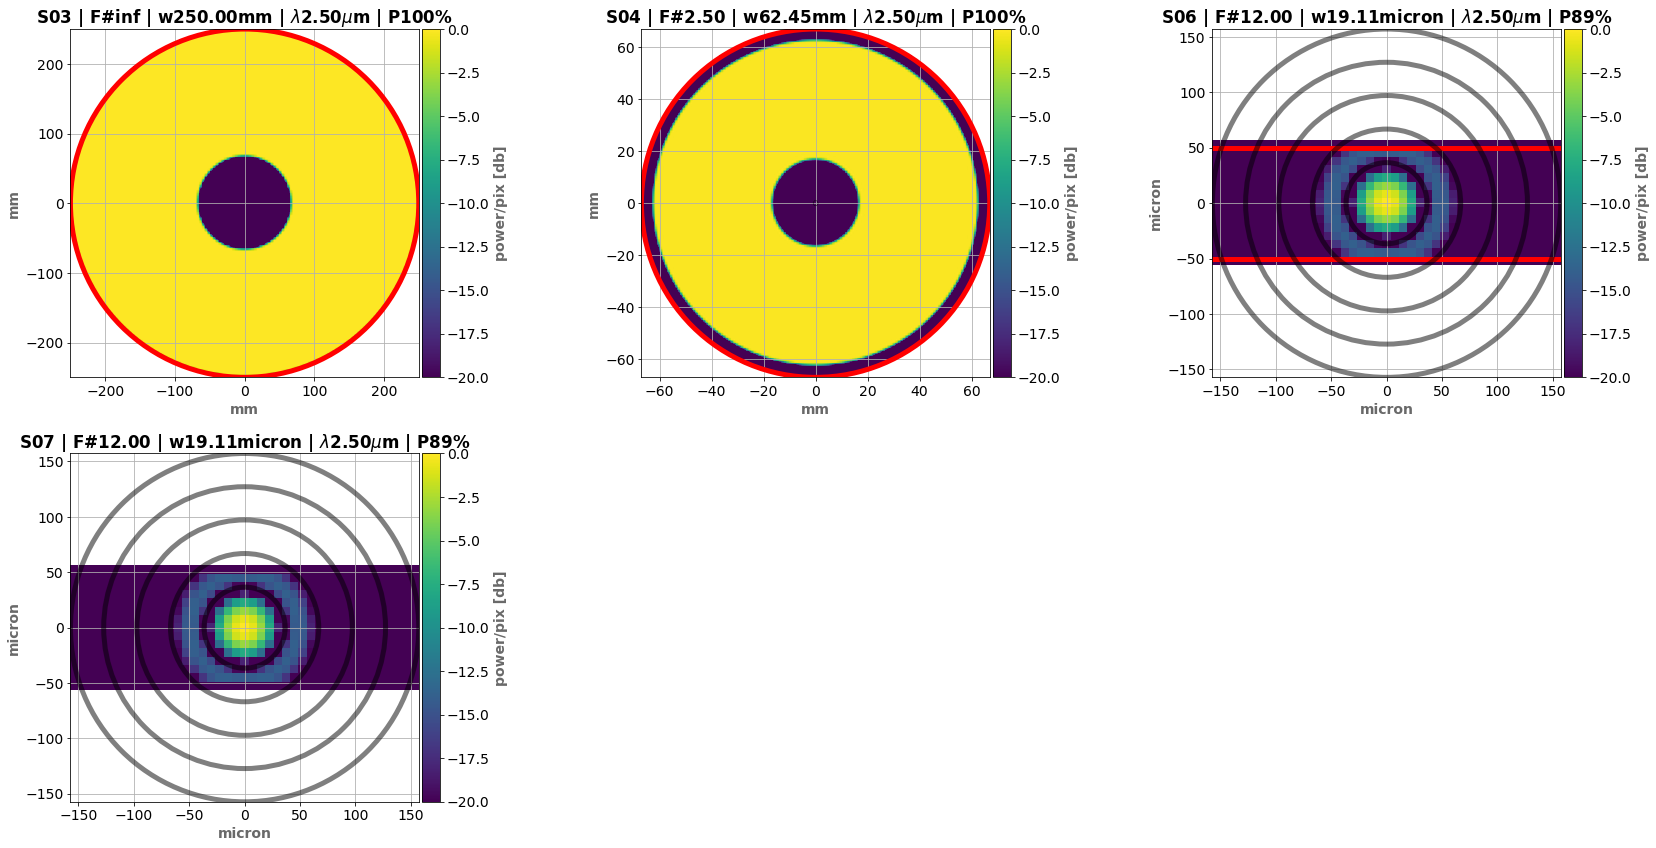

In [6]:
from paos.core.plot import plot_pop

plot_pop(retval, ima_scale='log', ncols=3)